In [0]:
!pip install emoji
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from tqdm import tqdm
from wordcloud import WordCloud
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
import string 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc,confusion_matrix,classification_report,log_loss
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
import re
from gensim.models import KeyedVectors 
from wordcloud import WordCloud
from scipy.sparse import hstack
from sklearn.manifold import TSNE 
from sklearn.preprocessing import Normalizer 
import plotly.offline as py
import plotly
from plotly.offline import *
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.naive_bayes import MultinomialNB
import emoji
from tqdm.notebook import tqdm
tqdm.pandas()

import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, SpatialDropout1D, add, concatenate
from tensorflow.compat.v1.keras.layers import CuDNNLSTM, Bidirectional, GlobalMaxPooling1D, GlobalAveragePooling1D
from tensorflow.keras.preprocessing import text, sequence
from gensim.models import KeyedVectors
from tensorflow.keras.utils import plot_model 
!pip install pyLDAvis
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
import nltk
nltk.download('wordnet')
from gensim.models import LdaModel
import tensorflow as tf
from textblob import TextBlob, Word, Blobber
from sklearn.preprocessing import StandardScaler

!pip show tensorflow
!pip install plot_model
!pip install tensorboardcolab
%load_ext tensorboard
!rm -rf ./logs/ 
import warnings
warnings.filterwarnings("ignore")

     |████████████████████████████████| 51kB 1.2MB/s 
  Created wheel for emoji: filename=emoji-0.5.4-cp36-none-any.whl size=42176 sha256=c4b5063117a76bbbd6dccd1fe281d1b1b78aa51da0655bc965c489a49feb9f3e
  Stored in directory: /root/.cache/pip/wheels/2a/a9/0a/4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 14.9MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=7db75b3388d35c1832f348d863b522f613c20860e38933419afbc6f1ccb803e6
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=8d842ad19f7ff6bba106ad4b5232d4b7395e3fa64819d8ad8bb7bbf332848e18
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Loading the train data into pandas dataframe
train = pd.read_csv('/content/drive/My Drive/train.csv')
# Loading the test data into pandas dataframe
test = pd.read_csv('/content/drive/My Drive/test.csv')

# Deep Learning model 1: Using Only Text Feature

![alt text](https://drive.google.com/uc?id=10hz-srvxju8mZs-ju3164v2bW1lRd_3j)

In [0]:
#https://www.kaggle.com/thousandvoices/simple-lstm
EMBEDDING_FILES = [
    '/content/drive/My Drive/jigsaw/crawl-300d-2M.gensim',
    '/content/drive/My Drive/jigsaw/glove.840B.300d.gensim'
]
NUM_MODELS = 2
BATCH_SIZE = 512
LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS
EPOCHS = 4
MAX_LEN = 220
IDENTITY_COLUMNS = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', 'black', 'white', 'psychiatric_or_mental_illness']

AUX_COLUMNS = ['target', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat']
TEXT_COLUMN = 'comment_text'
TARGET_COLUMN='target'
CHARS_TO_REMOVE = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—'

X_train, X_te = train_test_split(train, test_size=0.1,random_state=42)
X_train, X_cv = train_test_split(X_train, test_size=0.1,random_state=42)

x_train = X_train[TEXT_COLUMN].astype(str)
y_train = X_train[TARGET_COLUMN].values


x_cv = X_cv[TEXT_COLUMN].astype(str)
y_cv = X_cv[TARGET_COLUMN].values

x_te = X_te[TEXT_COLUMN].astype(str)
y_te = X_te[TARGET_COLUMN].values

for column in IDENTITY_COLUMNS + [TARGET_COLUMN]:
    X_train[column] = np.where(X_train[column] >= 0.5, True, False)
    X_cv[column] = np.where(X_cv[column] >= 0.5, True, False)
    X_te[column] = np.where(X_te[column] >= 0.5, True, False)

In [0]:
def build_matrix(word_index, path):
    embedding_index = KeyedVectors.load(path, mmap='r')
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        for candidate in [word, word.lower()]:
            if candidate in embedding_index:
                embedding_matrix[i] = embedding_index[candidate]
                break
    return embedding_matrix

In [0]:
tokenizer = text.Tokenizer(filters=CHARS_TO_REMOVE, lower=False)
tokenizer.fit_on_texts(list(x_train))

x_train = tokenizer.texts_to_sequences(x_train)
x_cv = tokenizer.texts_to_sequences(x_cv)
x_te = tokenizer.texts_to_sequences(x_te)

x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_cv = sequence.pad_sequences(x_cv, maxlen=MAX_LEN)
x_te = sequence.pad_sequences(x_te, maxlen=MAX_LEN)

In [0]:
#pickle.dump(tokenizer,open("/content/drive/My Drive/jigsaw/dltokenizer","wb"))
sample_weights = np.ones(len(x_train), dtype=np.float32)
sample_weights += X_train[IDENTITY_COLUMNS].sum(axis=1)
sample_weights += X_train[TARGET_COLUMN] * (~X_train[IDENTITY_COLUMNS]).sum(axis=1)
sample_weights += (~X_train[TARGET_COLUMN]) * X_train[IDENTITY_COLUMNS].sum(axis=1) * 5
sample_weights /= sample_weights.mean()

embedding_matrix = np.concatenate([build_matrix(tokenizer.word_index, f) for f in EMBEDDING_FILES], axis=-1)

In [0]:
  def build_model(embedding_matrix):
    words = Input(shape=(None,))
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)

    hidden = concatenate([
        GlobalMaxPooling1D()(x),
        GlobalAveragePooling1D()(x),
    ])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    hidden = add([hidden, Dense(DENSE_HIDDEN_UNITS, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid')(hidden)
    
    model = Model(inputs=words, outputs=result)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    #plot_model(model, to_file='/content/drive/My Drive/jigsaw/model1.png', show_shapes=True) 
    return model

In [0]:
!pip show tensorflow
!pip install plot_model
!pip install tensorboardcolab
%load_ext tensorboard
!rm -rf ./logs/ 
import warnings
warnings.filterwarnings("ignore")

Name: tensorflow
Version: 2.2.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: tensorboard, absl-py, keras-preprocessing, opt-einsum, h5py, grpcio, numpy, gast, protobuf, tensorflow-estimator, termcolor, astunparse, wrapt, six, wheel, google-pasta, scipy
Required-by: fancyimpute
The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
checkpoint_predictions = []
weights = []
checkpoint = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/jigsaw/Model11.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min') 
log_dir="/content/drive/My Drive/jigsaw/Model11/logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

model = build_model(embedding_matrix)
model.fit(x_train, y_train,batch_size=BATCH_SIZE,epochs=5,verbose=2,validation_data=(x_cv,y_cv),callbacks=[tensorboard_callback,checkpoint],sample_weight=[sample_weights.values, np.ones_like(sample_weights)])

2020-05-31 10:31:57,422 : WARNING : `write_grads` will be ignored in TensorFlow 2.0 for the `TensorBoard` Callback.


Epoch 1/5

Epoch 00001: val_loss improved from inf to 0.24552, saving model to /content/drive/My Drive/jigsaw/Model11.hdf5
2856/2856 - 829s - loss: 0.4226 - val_loss: 0.2455
Epoch 2/5

Epoch 00002: val_loss improved from 0.24552 to 0.24449, saving model to /content/drive/My Drive/jigsaw/Model11.hdf5
2856/2856 - 813s - loss: 0.4088 - val_loss: 0.2445
Epoch 3/5

Epoch 00003: val_loss improved from 0.24449 to 0.24227, saving model to /content/drive/My Drive/jigsaw/Model11.hdf5
2856/2856 - 813s - loss: 0.4039 - val_loss: 0.2423
Epoch 4/5

Epoch 00004: val_loss did not improve from 0.24227
2856/2856 - 809s - loss: 0.3998 - val_loss: 0.2475
Epoch 5/5

Epoch 00005: val_loss did not improve from 0.24227
2856/2856 - 808s - loss: 0.3963 - val_loss: 0.2436


In [0]:
%tensorboard --logdir='/content/drive/My Drive/jigsaw/Model11/logs/fit'

In [0]:
# load the model 
model1=tensorflow.keras.models.load_model('/content/drive/My Drive/jigsaw/Model11.hdf5')

predictions=model1.predict(x_te, batch_size=2048).flatten()
MODEL_NAME = 'score'
X_te[MODEL_NAME] = predictions
bias_metrics_df = compute_bias_metrics_for_model(X_te, IDENTITY_COLUMNS, MODEL_NAME, TARGET_COLUMN)
get_final_metric(bias_metrics_df, calculate_overall_auc(X_te, MODEL_NAME))

0.9319064728629746

# **Deep Learning Model 2 : Text feature + Additional Features**

Additional Features:
- topic features
- positive word count
- negative word count
- sentiment of each comment
- word count,character count

# Train cv split

In [0]:
X_train, X_te = train_test_split(train, test_size=0.1,random_state=42)

X_train, X_cv = train_test_split(X_train, test_size=0.1,random_state=42)

# Topic modeling ( Unsupervised Clustering Method )
- LDA ( Latent Dirichlet Allocation ) is an unsupervised machine-learning model that automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus. Thus, assisting better decision making.
- we will model our clean_text into 5 different topics and then take these topics as features.

In [0]:
#https://github.com/sonalijathar01/Toxic-comment-classification/blob/master/Jigsaw_UnIntended_Bias_Toxicity_Classification-Org.ipynb
%%time
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

# Tokenize and lemmatize
def preprocess(text):
    '''this is for preprocessing text using gensim.utils.simple_preprocess() function'''
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
            
    return result


data = X_train.clean_text.values.tolist()
processed_docs = []
for doc in data:
    processed_docs.append(preprocess(doc))

CPU times: user 11min 3s, sys: 2.11 s, total: 11min 5s
Wall time: 11min 5s


# Create the Dictionary and Corpus needed for Topic Modeling

In [0]:
%%time
# Create Dictionary
dictionary = gensim.corpora.Dictionary(processed_docs)

# Create Corpus
texts = processed_docs

# Term Document Frequency
# Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).
corpus = [dictionary.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]
CPU times: user 1min 12s, sys: 1.14 s, total: 1min 13s
Wall time: 1min 13s


In [0]:
pickle.dump(dictionary,open('/content/drive/My Drive/jigsaw/dictionary','wb'))
#dictionary=pickle.load(open('/content/drive/My Drive/jigsaw/dictionary','rb'))

In [0]:
# Human readable format of corpus (term-frequency)
[[(dictionary[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[('alaska', 1),
  ('career', 1),
  ('collegi', 1),
  ('good', 1),
  ('gymnast', 1),
  ('luck', 1),
  ('repres', 1),
  ('thank', 1)]]

# Building topic model

In [0]:
#this code took me 10 hours to run

# Build LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, random_state=100, update_every=1,
                                           chunksize=100, passes=10, alpha='auto', per_word_topics=True)

In [0]:
#pickle.dump(lda_model,open('/content/drive/My Drive/jigsaw/ldamodelall','wb'))
lda_model=pickle.load(open('/content/drive/My Drive/jigsaw/ldamodelall','rb'))

In [0]:
from gensim.models import CoherenceModel

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_docs, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.4943335322897525


In [0]:
# Print the Keyword in the 5 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0, '0.012*"life" + 0.011*"million" + 0.011*"question" + 0.009*"women" + 0.009*"church" + 0.007*"line" + 0.007*"pass" + 0.007*"job" + 0.006*"truth" + 0.006*"exact"'), (1, '0.022*"state" + 0.018*"govern" + 0.016*"money" + 0.012*"chang" + 0.012*"public" + 0.011*"care" + 0.011*"polit" + 0.009*"busi" + 0.009*"cost" + 0.009*"pay"'), (2, '0.039*"trump" + 0.022*"say" + 0.014*"like" + 0.014*"comment" + 0.013*"support" + 0.013*"fact" + 0.011*"presid" + 0.011*"read" + 0.011*"link" + 0.010*"articl"'), (3, '0.028*"peopl" + 0.018*"think" + 0.017*"know" + 0.016*"right" + 0.013*"want" + 0.011*"thing" + 0.009*"countri" + 0.009*"vote" + 0.008*"leav" + 0.008*"person"'), (4, '0.023*"time" + 0.023*"like" + 0.023*"year" + 0.017*"go" + 0.016*"good" + 0.014*"need" + 0.012*"come" + 0.012*"work" + 0.011*"live" + 0.011*"look"')]


In [0]:
# Visualize the topics on train
 pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.316418 -0.126554       1        1  29.260767
4     -0.116165 -0.198256       2        1  22.933718
1      0.076988 -0.076795       3        1  18.248371
2     -0.328856 -0.005775       4        1  16.829971
0      0.051615  0.407380       5        1  12.727179, topic_info=        Term           Freq          Total Category  logprob  loglift
36     trump  223988.000000  223988.000000  Default  30.0000  30.0000
48     peopl  283228.000000  283228.000000  Default  29.0000  29.0000
325     time  181322.000000  181322.000000  Default  28.0000  28.0000
225     year  177659.000000  177659.000000  Default  27.0000  27.0000
101     like  263286.000000  263286.000000  Default  26.0000  26.0000
...      ...            ...            ...      ...      ...      ...
526     self   21266.244141   21267.054688   Topic5  -5.3207   2.0614
2715  common   20741.863281   20742.675781   Topic5  -5.3457   2.0614
146   legisl   20882.074219   20882.892578   Topic5  -5.3389   2.0614
1805    sign   20782.708984   20783.525391   Topic5  -5.3437   2.0614
1247   natur   20565.265625   20566.076172   Topic5  -5.3542   2.0614

[195 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
555       5  0.999943   accept
396       1  0.999983   actual
1313      1  0.999977     agre
425       3  0.999984   alaska
27        4  0.999985  america
...     ...       ...      ...
353       3  0.259851     work
394       1  0.999982    world
395       4  0.999991    write
433       3  0.999982    wrong
225       2  0.999993     year

[173 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

### CV data preprocessing

In [0]:
%%time
data1 = X_cv.clean_text.values.tolist()
processed_docs1 = []
for doc in data1:
    processed_docs1.append(preprocess(doc))

print(processed_docs1[:1])
corpus1= [dictionary.doc2bow(text) for text in processed_docs1]

[['fals', 'doctrin', 'attack', 'catholic', 'contain', 'articl']]
CPU times: user 1min 19s, sys: 386 ms, total: 1min 19s
Wall time: 1min 19s


In [0]:
vis = pyLDAvis.gensim.prepare(lda_model, corpus1, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.316418 -0.126554       1        1  29.319233
4     -0.116165 -0.198256       2        1  22.903652
1      0.076988 -0.076795       3        1  18.219179
2     -0.328856 -0.005775       4        1  16.823885
0      0.051615  0.407380       5        1  12.734054, topic_info=        Term          Freq         Total Category  logprob  loglift
36     trump  24865.000000  24865.000000  Default  30.0000  30.0000
48     peopl  31515.000000  31515.000000  Default  29.0000  29.0000
325     time  20109.000000  20109.000000  Default  28.0000  28.0000
225     year  19703.000000  19703.000000  Default  27.0000  27.0000
101     like  29209.000000  29209.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
526     self   2362.906738   2362.996826   Topic5  -5.3207   2.0609
2715  common   2304.642334   2304.732422   Topic5  -5.3457   2.0609
146   legisl   2320.221191   2320.312012   Topic5  -5.3389   2.0609
1805    sign   2309.180908   2309.271729   Topic5  -5.3437   2.0609
1247   natur   2285.020508   2285.110596   Topic5  -5.3542   2.0609

[197 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
555       5  0.999947   accept
396       1  0.999981   actual
1313      1  0.999995     agre
425       3  1.000060   alaska
27        4  0.999954  america
...     ...       ...      ...
353       3  0.259820     work
394       1  0.999945    world
395       4  1.000049    write
433       3  0.999999    wrong
225       2  0.999984     year

[175 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 2, 3, 1])

### Test Data Preprocessing

In [0]:
%%time
data11 = X_te.clean_text.values.tolist()
processed_docs11 = []
for doc in data11:
    processed_docs11.append(preprocess(doc))

print(processed_docs11[:1])
corpus11= [dictionary.doc2bow(text) for text in processed_docs11]

[['breath', 'fresh', 'embrac', 'common', 'sens', 'valu', 'instead', 'leadership', 'canada', 'clear', 'differ', 'page', 'read', 'differ', 'book']]
CPU times: user 1min 24s, sys: 393 ms, total: 1min 25s
Wall time: 1min 25s


# Actual test data

In [0]:
#will use for submission
%%time
data_test = test.clean_text.values.tolist()
processed_docs_test = []
for doc in data_test:
    processed_docs_test.append(preprocess(doc))

print(processed_docs_test[:1])
corpus_test= [dictionary.doc2bow(text) for text in processed_docs_test]

[['integr', 'mean', 'debt', 'appli', 'presid', 'trump']]
CPU times: user 45.9 s, sys: 238 ms, total: 46.2 s
Wall time: 46.2 s


# Converting Topics to Feature Vectors

In [0]:
# For train vectors
train_vecs = []

for i in range(len(X_train)):
    top_train_topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    topic_train_vec = [top_train_topics[i][1] for i in range(5)]
    train_vecs.append(topic_train_vec)
# Printing top five train vectors 
train_vecs[:5]

[[0.2572527, 0.116501085, 0.15880889, 0.23540507, 0.23203227],
 [0.1085511, 0.12808271, 0.23760512, 0.205904, 0.31985703],
 [0.10038725, 0.13197713, 0.24514905, 0.28512138, 0.23736522],
 [0.100387305, 0.13197719, 0.24514884, 0.23232232, 0.29016432],
 [0.09079904, 0.11937169, 0.22173429, 0.21013263, 0.35796234]]

In [0]:
# For cv vectors
cv_vecs = []
for i in range(len(X_cv)):
    top_cv_topics = lda_model.get_document_topics(corpus1[i], minimum_probability=0.0)
    topic_cv_vec = [top_cv_topics[i][1] for i in range(5)]
    cv_vecs.append(topic_cv_vec)
# Printing top five test vectors
cv_vecs[:5]

[[0.09080016, 0.16712835, 0.17397994, 0.30563962, 0.2624519],
 [0.23157655, 0.07987076, 0.23264326, 0.25131276, 0.20459664],
 [0.132223, 0.1595133, 0.16605367, 0.33729813, 0.2049119],
 [0.06035246, 0.14152181, 0.17819482, 0.3855083, 0.23442256],
 [0.1206431, 0.13538024, 0.18808436, 0.24763924, 0.30825308]]

In [0]:
# For test vectors
te_vecs = []

for i in range(len(X_te)):
    top_te_topics = lda_model.get_document_topics(corpus11[i], minimum_probability=0.0)
    topic_te_vec = [top_te_topics[i][1] for i in range(5)]
    te_vecs.append(topic_te_vec)
# Printing top five test vectors
te_vecs[:5]

[[0.1436283, 0.28519964, 0.16165379, 0.14947933, 0.26003894],
 [0.075519, 0.11585588, 0.19756171, 0.23977299, 0.37129042],
 [0.19178723, 0.16131727, 0.134504, 0.26750937, 0.24488218],
 [0.16126405, 0.080642395, 0.21566236, 0.2366619, 0.30576932],
 [0.070576765, 0.2041459, 0.17327477, 0.2737662, 0.27823636]]

In [0]:
# For actual test vectors
test_vecs = []

for i in range(len(test)):
    top_test_topics = lda_model.get_document_topics(corpus_test[i], minimum_probability=0.0)
    topic_test_vec = [top_test_topics[i][1] for i in range(5)]
    test_vecs.append(topic_test_vec)

In [0]:
# Create the new df with 5 topics 
train_features = pd.DataFrame(train_vecs,columns=['Topic-1','Topic-2','Topic-3','Topic-4','Topic-5'])
cv_features = pd.DataFrame(cv_vecs,columns=['Topic-1','Topic-2','Topic-3','Topic-4','Topic-5'])
te_features = pd.DataFrame(te_vecs,columns=['Topic-1','Topic-2','Topic-3','Topic-4','Topic-5'])
test_features = pd.DataFrame(test_vecs,columns=['Topic-1','Topic-2','Topic-3','Topic-4','Topic-5'])

# Count number of positive and negative words in each comment
- https://gist.github.com/mkulakowski2/4289441
- https://gist.github.com/mkulakowski2/4289437

In [0]:
#I have created 2 files one for  positive words taken from https://gist.github.com/mkulakowski2/4289437 ,another for negative words taken from https://gist.github.com/mkulakowski2/4289441

#load pos,neg words
pos_path='/content/drive/My Drive/jigsaw/pos.txt'
neg_path='/content/drive/My Drive/jigsaw/neg.txt'

def load_file(path):
  fp=open(path,'r')
  all_lines=fp.readlines()
  words_list=[]
  for line in all_lines:
    words_list.append(line.strip())
  fp.close()
  return words_list

pos_words=load_file(pos_path)
neg_words=load_file(neg_path)

#count  number of positive and negative words in each comment
def pos_word_count(comment):
  count=0
  for word in comment.split():
    if word in pos_words:
      count=count+1
  return count  

def neg_word_count(comment):
  count=0
  for word in comment.split():
    if word in neg_words:
      count=count+1
  return count  

In [0]:
# pos_word_count 
count=[]
for i in X_train['clean_text'].values:
  count.append(pos_word_count(str(i)))
train_features['pos_word_count']=count

count=[]
for i in X_cv['clean_text'].values:
  count.append(pos_word_count(str(i)))
cv_features['pos_word_count']=count

count=[]
for i in X_te['clean_text'].values:
  count.append(pos_word_count(str(i)))
te_features['pos_word_count']=count

count=[]
for i in test['clean_text'].values:
  count.append(pos_word_count(str(i)))
test_features['pos_word_count']=count

# neg_word_count
count=[]
for i in X_train['clean_text'].values:
  count.append(neg_word_count(str(i)))
train_features['neg_word_count']=count

count=[]
for i in X_cv['clean_text'].values:
  count.append(neg_word_count(str(i)))
cv_features['neg_word_count']=count

count=[]
for i in X_te['clean_text'].values:
  count.append(neg_word_count(str(i)))
te_features['neg_word_count']=count

count=[]
for i in test['clean_text'].values:
  count.append(pos_word_count(str(i)))
test_features['neg_word_count']=count

# Find the  sentiment of each comment

In [0]:
#https://www.pluralsight.com/guides/natural-language-processing-extracting-sentiment-from-text-data
%%time
sentiment_count=[]
for i in X_train['clean_text'].values:
  sentiment_count.append(TextBlob(i).sentiment[0])
train_features['sentiment']=sentiment_count

sentiment_count=[]
for i in X_cv['clean_text'].values:
  sentiment_count.append(TextBlob(i).sentiment[0])
cv_features['sentiment']=sentiment_count

sentiment_count=[]
for i in X_te['clean_text'].values:
  sentiment_count.append(TextBlob(i).sentiment[0])
te_features['sentiment']=sentiment_count

sentiment_count=[]
for i in test['clean_text'].values:
  sentiment_count.append(TextBlob(i).sentiment[0])
test_features['sentiment']=sentiment_count

CPU times: user 19min 6s, sys: 2.87 s, total: 19min 9s
Wall time: 19min 9s


# Features calculated during the EDA

In [0]:
from tqdm import tqdm
#comment_word_count
count=[]
for i in tqdm(X_train['clean_text'].values):
  count.append(len(i.split()))
train_features['comment_word_count']=count

count=[]
for i in tqdm(X_cv['clean_text'].values):
  count.append(len(i.split()))
cv_features['comment_word_count']=count

count=[]
for i in tqdm(X_te['clean_text'].values):
  count.append(len(i.split()))
te_features['comment_word_count']=count

count=[]
for i in tqdm(test['clean_text'].values):
  count.append(len(i.split()))
test_features['comment_word_count']=count

#comment_char_count

count=[]
for i in tqdm(X_train['clean_text'].values):
  count.append(len(i))
train_features['comment_char_count']=count

count=[]
for i in tqdm(X_cv['clean_text'].values):
  count.append(len(i))
cv_features['comment_char_count']=count

count=[]
for i in tqdm(X_te['clean_text'].values):
  count.append(len(i))
te_features['comment_char_count']=count

count=[]
for i in tqdm(test['clean_text'].values):
  count.append(len(i))
test_features['comment_char_count']=count

100%|██████████| 97320/97320 [00:00<00:00, 1503715.79it/s]


In [0]:
test_features

,Topic-1,Topic-2,Topic-3,Topic-4,Topic-5,pos_word_count,neg_word_count,sentiment,comment_word_count,comment_char_count
0,0.149603,0.176198,0.133320,0.316583,0.224297,1,1,0.000000,8,52
1,0.195654,0.175510,0.132552,0.220671,0.275613,0,0,0.000000,7,55
2,0.105486,0.196813,0.275211,0.191042,0.231447,3,3,0.350000,19,120
3,0.183384,0.153363,0.218330,0.211242,0.233680,5,5,0.305556,96,638
4,0.178390,0.231265,0.128876,0.252196,0.209274,2,2,0.108571,30,202
...,...,...,...,...,...,...,...,...,...,...
97315,0.095354,0.141435,0.132553,0.304900,0.325758,0,0,0.000000,8,54
97316,0.136550,0.126796,0.222251,0.236765,0.277638,2,2,0.283333,30,186
97317,0.212566,0.177888,0.139512,0.281822,0.188212,1,1,0.800000,7,43
97318,0.189127,0.242099,0.098241,0.195365,0.275169,3,3,0.104762,19,120


# Encoding Numerical features

In [0]:
numerical_train_1=train_features['Topic-1'].values.reshape(-1, 1)
numerical_train_2=train_features['Topic-2'].values.reshape(-1, 1)
numerical_train_3=train_features['Topic-3'].values.reshape(-1, 1)
numerical_train_4=train_features['Topic-4'].values.reshape(-1, 1)
numerical_train_5=train_features['Topic-5'].values.reshape(-1, 1)
numerical_train_6=train_features['pos_word_count'].values.reshape(-1, 1)
numerical_train_7=train_features['neg_word_count'].values.reshape(-1, 1)
numerical_train_8=train_features['sentiment'].values.reshape(-1, 1)
numerical_train_9=train_features['comment_word_count'].values.reshape(-1, 1)
numerical_train_10=train_features['comment_char_count'].values.reshape(-1, 1)

numerical_cv_1=cv_features['Topic-1'].values.reshape(-1, 1)
numerical_cv_2=cv_features['Topic-2'].values.reshape(-1, 1)
numerical_cv_3=cv_features['Topic-3'].values.reshape(-1, 1)
numerical_cv_4=cv_features['Topic-4'].values.reshape(-1, 1)
numerical_cv_5=cv_features['Topic-5'].values.reshape(-1, 1)
numerical_cv_6=cv_features['pos_word_count'].values.reshape(-1, 1)
numerical_cv_7=cv_features['neg_word_count'].values.reshape(-1, 1)
numerical_cv_8=cv_features['sentiment'].values.reshape(-1, 1)
numerical_cv_9=cv_features['comment_word_count'].values.reshape(-1, 1)
numerical_cv_10=cv_features['comment_char_count'].values.reshape(-1, 1)

numerical_te_1=te_features['Topic-1'].values.reshape(-1, 1)
numerical_te_2=te_features['Topic-2'].values.reshape(-1, 1)
numerical_te_3=te_features['Topic-3'].values.reshape(-1, 1)
numerical_te_4=te_features['Topic-4'].values.reshape(-1, 1)
numerical_te_5=te_features['Topic-5'].values.reshape(-1, 1)
numerical_te_6=te_features['pos_word_count'].values.reshape(-1, 1)
numerical_te_7=te_features['neg_word_count'].values.reshape(-1, 1)
numerical_te_8=te_features['sentiment'].values.reshape(-1, 1)
numerical_te_9=te_features['comment_word_count'].values.reshape(-1, 1)
numerical_te_10=te_features['comment_char_count'].values.reshape(-1, 1)

numerical_test_1=test_features['Topic-1'].values.reshape(-1, 1)
numerical_test_2=test_features['Topic-2'].values.reshape(-1, 1)
numerical_test_3=test_features['Topic-3'].values.reshape(-1, 1)
numerical_test_4=test_features['Topic-4'].values.reshape(-1, 1)
numerical_test_5=test_features['Topic-5'].values.reshape(-1, 1)
numerical_test_6=test_features['pos_word_count'].values.reshape(-1, 1)
numerical_test_7=test_features['neg_word_count'].values.reshape(-1, 1)
numerical_test_8=test_features['sentiment'].values.reshape(-1, 1)
numerical_test_9=test_features['comment_word_count'].values.reshape(-1, 1)
numerical_test_10=test_features['comment_char_count'].values.reshape(-1, 1)


num_tr=np.concatenate((numerical_train_1,numerical_train_2,numerical_train_3,numerical_train_4,numerical_train_5,numerical_train_6,numerical_train_7,numerical_train_8,numerical_train_9,numerical_train_10),axis=1)
num_cv=np.concatenate((numerical_cv_1,numerical_cv_2,numerical_cv_3,numerical_cv_4,numerical_cv_5,numerical_cv_6,numerical_cv_7,numerical_cv_8,numerical_cv_9,numerical_cv_10),axis=1)
num_te=np.concatenate((numerical_te_1,numerical_te_2,numerical_te_3,numerical_te_4,numerical_te_5,numerical_te_6,numerical_te_7,numerical_te_8,numerical_te_9,numerical_te_10),axis=1)
num_test=np.concatenate((numerical_test_1,numerical_test_2,numerical_test_3,numerical_test_4,numerical_test_5,numerical_test_6,numerical_test_7,numerical_test_8,numerical_test_9,numerical_test_10),axis=1)

numerical=StandardScaler()
numerical_train=numerical.fit_transform(num_tr)
numerical_cv=numerical.transform(num_cv)
numerical_te=numerical.transform(num_te)
numerical_test=numerical.transform(num_test)

# Deep Learning Model Data Preparation

In [0]:
EMBEDDING_FILES = [
    '/content/drive/My Drive/jigsaw/crawl-300d-2M.gensim',
    '/content/drive/My Drive/jigsaw/glove.840B.300d.gensim'
]
NUM_MODELS = 2
BATCH_SIZE = 512
LSTM_UNITS = 128
DENSE_HIDDEN_UNITS = 4 * LSTM_UNITS
EPOCHS = 4
MAX_LEN = 220
IDENTITY_COLUMNS = ['male', 'female', 'homosexual_gay_or_lesbian', 'christian', 'jewish', 'muslim', 'black', 'white', 'psychiatric_or_mental_illness']

TEXT_COLUMN = 'comment_text'
TARGET_COLUMN='target'
CHARS_TO_REMOVE = '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n“”’\'∞θ÷α•à−β∅³π‘₹´°£€\×™√²—'

x_train = X_train[TEXT_COLUMN].astype(str)
y_train = X_train[TARGET_COLUMN].values

x_cv = X_cv[TEXT_COLUMN].astype(str)
y_cv = X_cv[TARGET_COLUMN].values

x_te = X_te[TEXT_COLUMN].astype(str)
x_test = test[TEXT_COLUMN].astype(str)

for column in IDENTITY_COLUMNS + [TARGET_COLUMN]:
    X_train[column] = np.where(X_train[column] >= 0.5, True, False)
    X_cv[column] = np.where(X_cv[column] >= 0.5, True, False)
    X_te[column] = np.where(X_te[column] >= 0.5, True, False)

In [0]:
tokenizer = text.Tokenizer(filters=CHARS_TO_REMOVE, lower=False)
tokenizer.fit_on_texts(list(x_train))

x_train = tokenizer.texts_to_sequences(x_train)
x_cv = tokenizer.texts_to_sequences(x_cv)
x_te = tokenizer.texts_to_sequences(x_te)
x_test = tokenizer.texts_to_sequences(x_test)

x_train = sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_cv = sequence.pad_sequences(x_cv, maxlen=MAX_LEN)
x_te = sequence.pad_sequences(x_te, maxlen=MAX_LEN)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_LEN)

In [0]:
def build_matrix(word_index, path):
    ''' this function prepares embedding matrix'''
    embedding_index = KeyedVectors.load(path, mmap='r')
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        for candidate in [word, word.lower()]:
            if candidate in embedding_index:
                embedding_matrix[i] = embedding_index[candidate]
                break
    return embedding_matrix

sample_weights = np.ones(len(x_train), dtype=np.float32)
sample_weights += X_train[IDENTITY_COLUMNS].sum(axis=1)
sample_weights += X_train[TARGET_COLUMN] * (~X_train[IDENTITY_COLUMNS]).sum(axis=1)
sample_weights += (~X_train[TARGET_COLUMN]) * X_train[IDENTITY_COLUMNS].sum(axis=1) * 5
sample_weights /= sample_weights.mean()

embedding_matrix = np.concatenate([build_matrix(tokenizer.word_index, f) for f in EMBEDDING_FILES], axis=-1)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning:

This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function



# Deep Learning Model 2 : Dropout 0.2 + text feature + Additional Features

![alt text](https://drive.google.com/uc?id=149CK11fzBekwRp57TcBShUdacGsCUO6P)

In [0]:
def build_model(embedding_matrix):
    words = Input(shape=(None,),name="text_feature")
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)
    x = SpatialDropout1D(0.2)(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    
    numerical_feats = Input(shape=(10,),name="numerical_features")
    numerical_featss = Dense(256,activation="relu",kernel_initializer="he_normal")(numerical_feats)

    hidden = concatenate([GlobalMaxPooling1D()(x),GlobalAveragePooling1D()(x),numerical_featss,])
    hidden = add([hidden, Dense(768, activation='relu')(hidden)])
    hidden = add([hidden, Dense(768, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid')(hidden)
    
    model = Model(inputs=[words,numerical_feats], outputs=[result])#, aux_result])
    model.compile(loss='binary_crossentropy', optimizer='adam')
    plot_model(model, to_file='/content/drive/My Drive/jigsaw/Model2.png', show_shapes=True) 

    return model

In [0]:
#all epochs to fit once
from datetime import datetime, timedelta

checkpoint = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/jigsaw/Model22.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min') 
log_dir="/content/drive/My Drive/jigsaw/Model22/logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)
model = build_model(embedding_matrix)
model.fit([x_train,numerical_train], y_train,batch_size=BATCH_SIZE,epochs=5,verbose=2,validation_data=([x_cv,numerical_cv],y_cv),callbacks=[tensorboard_callback,checkpoint],sample_weight=[sample_weights.values, np.ones_like(sample_weights)])

2020-05-31 12:09:21,855 : WARNING : `write_grads` will be ignored in TensorFlow 2.0 for the `TensorBoard` Callback.


Epoch 1/5

Epoch 00001: val_loss improved from inf to 0.25208, saving model to /content/drive/My Drive/jigsaw/Model22.hdf5
2856/2856 - 915s - loss: 0.4270 - val_loss: 0.2521
Epoch 2/5

Epoch 00002: val_loss improved from 0.25208 to 0.24228, saving model to /content/drive/My Drive/jigsaw/Model22.hdf5
2856/2856 - 818s - loss: 0.4096 - val_loss: 0.2423
Epoch 3/5

Epoch 00003: val_loss did not improve from 0.24228
2856/2856 - 816s - loss: 0.4045 - val_loss: 0.2423
Epoch 4/5

Epoch 00004: val_loss improved from 0.24228 to 0.23914, saving model to /content/drive/My Drive/jigsaw/Model22.hdf5
2856/2856 - 826s - loss: 0.4002 - val_loss: 0.2391
Epoch 5/5

Epoch 00005: val_loss improved from 0.23914 to 0.23825, saving model to /content/drive/My Drive/jigsaw/Model22.hdf5
2856/2856 - 821s - loss: 0.3964 - val_loss: 0.2382


In [0]:
%tensorboard --logdir='/content/drive/My Drive/jigsaw/Model22/logs/fit'

In [0]:
# load the model 
model1=tensorflow.keras.models.load_model('/content/drive/My Drive/jigsaw/Model22.hdf5')
MODEL_NAME = 'with_DO1'
X_te[MODEL_NAME] =model1.predict([x_te,numerical_te], batch_size=2048).flatten() 
bias_metrics_df = compute_bias_metrics_for_model(X_te, IDENTITY_COLUMNS, MODEL_NAME, TARGET_COLUMN)
get_final_metric(bias_metrics_df, calculate_overall_auc(X_te, MODEL_NAME))

0.932494270491741

# Deep Learning Model 3: Without Dropout  + text feature + Additional Features

![alt text](https://drive.google.com/uc?id=1pQmBx6ngX1nJ4OaiL6GBtWsXa7ErTia_)

In [0]:
def build_model(embedding_matrix):
    words = Input(shape=(None,),name="text_feature")
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    
    numerical_feats = Input(shape=(10,),name="numerical_features")
    numerical_featss = Dense(256,activation="relu",kernel_initializer="he_normal")(numerical_feats)

    hidden = concatenate([GlobalMaxPooling1D()(x),GlobalAveragePooling1D()(x),numerical_featss,])
    hidden = add([hidden, Dense(768, activation='relu')(hidden)])
    hidden = add([hidden, Dense(768, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid')(hidden)
    
    model = Model(inputs=[words,numerical_feats], outputs=result)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    plot_model(model, to_file='/content/drive/My Drive/jigsaw/model33.png', show_shapes=True) 
    return model

In [0]:
#all epochs to fit once
from datetime import datetime, timedelta

checkpoint = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/jigsaw/Model33.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min') 
log_dir="/content/drive/My Drive/jigsaw/Model33/logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)
model = build_model(embedding_matrix)
model.fit([x_train,numerical_train], y_train,batch_size=BATCH_SIZE,epochs=15,verbose=2,validation_data=([x_cv,numerical_cv],y_cv),callbacks=[tensorboard_callback,checkpoint],sample_weight=[sample_weights.values, np.ones_like(sample_weights)])

2020-06-01 05:37:32,131 : WARNING : `write_grads` will be ignored in TensorFlow 2.0 for the `TensorBoard` Callback.


Epoch 1/15

Epoch 00001: val_loss improved from inf to 0.23934, saving model to /content/drive/My Drive/jigsaw/Model33.hdf5
2856/2856 - 776s - loss: 0.4260 - val_loss: 0.2393
Epoch 2/15

Epoch 00002: val_loss did not improve from 0.23934
2856/2856 - 767s - loss: 0.4070 - val_loss: 0.2395
Epoch 3/15

Epoch 00003: val_loss improved from 0.23934 to 0.23773, saving model to /content/drive/My Drive/jigsaw/Model33.hdf5
2856/2856 - 772s - loss: 0.4009 - val_loss: 0.2377
Epoch 4/15

Epoch 00004: val_loss improved from 0.23773 to 0.23526, saving model to /content/drive/My Drive/jigsaw/Model33.hdf5
2856/2856 - 773s - loss: 0.3952 - val_loss: 0.2353
Epoch 5/15

Epoch 00005: val_loss did not improve from 0.23526
2856/2856 - 768s - loss: 0.3895 - val_loss: 0.2416
Epoch 6/15

Epoch 00006: val_loss did not improve from 0.23526
2856/2856 - 769s - loss: 0.3838 - val_loss: 0.2380
Epoch 7/15

Epoch 00007: val_loss did not improve from 0.23526
2856/2856 - 768s - loss: 0.3784 - val_loss: 0.2405
Epoch 8/15


In [0]:
%tensorboard --logdir='/content/drive/My Drive/jigsaw/Model33/logs/fit'

In [0]:
# load the model 
model1=tensorflow.keras.models.load_model('/content/drive/My Drive/jigsaw/Model33.hdf5')
MODEL_NAME = 'withoutDP'
X_te[MODEL_NAME] =model1.predict([x_te,numerical_te], batch_size=2048).flatten() 
bias_metrics_df = compute_bias_metrics_for_model(X_te, IDENTITY_COLUMNS, MODEL_NAME, TARGET_COLUMN)
get_final_metric(bias_metrics_df, calculate_overall_auc(X_te, MODEL_NAME))

0.930495739941519

# Deep Learning Model 4: With 0.5 Dropout  + text feature + Additional Features

![alt text](https://drive.google.com/uc?id=11W8r0J4lTa9LXuySbNfnFxpaSd1ERaNe)

In [0]:
def build_model(embedding_matrix):
    words = Input(shape=(None,),name="text_feature")
    x = Embedding(*embedding_matrix.shape, weights=[embedding_matrix], trainable=False)(words)
    x = SpatialDropout1D(0.5)(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    x = Bidirectional(CuDNNLSTM(LSTM_UNITS, return_sequences=True))(x)
    
    numerical_feats = Input(shape=(10,),name="numerical_features")
    numerical_featss = Dense(256,activation="relu",kernel_initializer="he_normal")(numerical_feats)

    hidden = concatenate([GlobalMaxPooling1D()(x),GlobalAveragePooling1D()(x),numerical_featss,])
    hidden = add([hidden, Dense(768, activation='relu')(hidden)])
    hidden = add([hidden, Dense(768, activation='relu')(hidden)])
    result = Dense(1, activation='sigmoid')(hidden)
    
    model = Model(inputs=[words,numerical_feats], outputs=result)
    model.compile(loss='binary_crossentropy', optimizer='adam')
    plot_model(model, to_file='/content/drive/My Drive/jigsaw/model44.png', show_shapes=True) 
   
    return model

In [0]:
from datetime import datetime, timedelta

checkpoint = tensorflow.keras.callbacks.ModelCheckpoint('/content/drive/My Drive/jigsaw/Model44.hdf5', monitor='val_loss', verbose=1, save_best_only=True, mode='min') 
log_dir="/content/drive/My Drive/jigsaw/Model44/logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)
model = build_model(embedding_matrix)
model.fit([x_train,numerical_train], y_train,batch_size=BATCH_SIZE,epochs=5,verbose=2,validation_data=([x_cv,numerical_cv],y_cv),callbacks=[tensorboard_callback,checkpoint],sample_weight=[sample_weights.values, np.ones_like(sample_weights)])

2020-06-01 08:59:33,564 : WARNING : `write_grads` will be ignored in TensorFlow 2.0 for the `TensorBoard` Callback.


Epoch 1/5

Epoch 00001: val_loss improved from inf to 0.25312, saving model to /content/drive/My Drive/jigsaw/Model44.hdf5
2856/2856 - 793s - loss: 0.4400 - val_loss: 0.2531
Epoch 2/5

Epoch 00002: val_loss improved from 0.25312 to 0.25297, saving model to /content/drive/My Drive/jigsaw/Model44.hdf5
2856/2856 - 794s - loss: 0.4153 - val_loss: 0.2530
Epoch 3/5

Epoch 00003: val_loss did not improve from 0.25297
2856/2856 - 788s - loss: 0.4106 - val_loss: 0.2542
Epoch 4/5

Epoch 00004: val_loss improved from 0.25297 to 0.25020, saving model to /content/drive/My Drive/jigsaw/Model44.hdf5
2856/2856 - 793s - loss: 0.4076 - val_loss: 0.2502
Epoch 5/5

Epoch 00005: val_loss improved from 0.25020 to 0.24852, saving model to /content/drive/My Drive/jigsaw/Model44.hdf5
2856/2856 - 794s - loss: 0.4053 - val_loss: 0.2485


In [0]:
%tensorboard --logdir='/content/drive/My Drive/jigsaw/Model44/logs/fit'

In [0]:
# load the model 
model1=tensorflow.keras.models.load_model('/content/drive/My Drive/jigsaw/Model44.hdf5')
MODEL_NAME = 'DP'
X_te[MODEL_NAME] =model1.predict([x_te,numerical_te], batch_size=2048).flatten() 
bias_metrics_df = compute_bias_metrics_for_model(X_te, IDENTITY_COLUMNS, MODEL_NAME, TARGET_COLUMN)
get_final_metric(bias_metrics_df, calculate_overall_auc(X_te, MODEL_NAME))

0.9317927713596027

### From above trained models Model 2(Dropout 0.2 + text feature + Additional Features)has given us high score.so lets load that trained model and predict on test data.

In [0]:
test = pd.read_csv('/content/drive/My Drive/test.csv')
x_test=pickle.load(open('/content/drive/My Drive/jigsaw/xtest','rb'))
numerical_test=pickle.load(open('/content/drive/My Drive/jigsaw/numericaltest','rb'))

In [0]:
# load the model 
model1=tensorflow.keras.models.load_model('/content/drive/My Drive/jigsaw/Model22.hdf5')
predictions=model1.predict([x_test,numerical_test], batch_size=2048).flatten() 

submission = pd.DataFrame.from_dict({
    'id': test.id,
    'prediction': predictions
})
submission.to_csv('/content/drive/My Drive/jigsaw/submission.csv', index=False)

**On kaggle kernel we got a score of 0.93112**

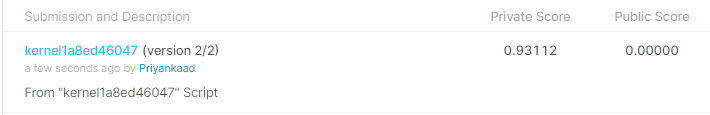

# Results

In [0]:
from prettytable import PrettyTable
import pandas as pd 
   
x = PrettyTable()
x.field_names = ["Model", "ROC-AUC Score", "Custom  Metric Score"]
x.add_row(["Logistic Regression", 0.95,  0.8904733235626956])
x.add_row(["Naive Bayes\t", 0.88, 0.837811746713348])
x.add_row(["SVM\t",      0.95,   0.8814130929571368])
x.add_row(["Deep Learning", " - \t",  0.9319064728629746])
print(x)

+---------------------+---------------+----------------------+
|        Model        | ROC-AUC Score | Custom  Metric Score |
+---------------------+---------------+----------------------+
| Logistic Regression |      0.95     |  0.8904733235626956  |
|     Naive Bayes	    |      0.88     |  0.837811746713348   |
|         SVM	        |      0.95     |  0.8814130929571368  |
|    Deep Learning    |       - 	     |  0.9319064728629746  |
+---------------------+---------------+----------------------+


### After adding additional features

In [0]:
x = PrettyTable()
x.field_names = ["Model\t\t\t\t\t", "\tCustom  Metric Score"]
x.add_row(["Dropout 0.2 + text feature + Additional Features\t\t", 0.932494270491741])
x.add_row(["Without Dropout + text feature + Additional Features\t", 0.930495739941519])
x.add_row(["With 0.5 Dropout + text feature + Additional Features\t", 0.9317927713596027])
print(x)

+--------------------------------------------------------+-----------------------+
|                       Model					                       | 	Custom  Metric Score |
+--------------------------------------------------------+-----------------------+
|   Dropout 0.2 + text feature + Additional Features		   |   0.932494270491741   |
| Without Dropout + text feature + Additional Features	  |   0.930495739941519   |
| With 0.5 Dropout + text feature + Additional Features	 |   0.9317927713596027  |
+--------------------------------------------------------+-----------------------+


# Conclusion
1) As we have seen machine learning models performed very well when we use roc-auc metric but when we used custom metric then it has given compartively low score.</br>
2) We have tried three machine learning models out of them Logistic regression has given higher score followed by SVM ,Naive bayes model.</br>
3) To improve performance on custom metric we have trained **five** deep learning models out of which model named **"Dropout 0.2 + text feature + Additional Features"**which has given **0.9324 on custom metric** ,we can see that this score is much higher than what we got using previous models.
4)**After adding those additional features ,we have improved our model from 0.9319064728629746 to  0.932494270491741**.

# Step by Step Procedure to solve this case study

1) **Business Problem**: First go through business problem, understand problem statement,define business objectives and constraints, understand data fields.</br>
2)**Map the real-world problem to a Machine Learning Problem**: understand what type of Machine Learning Problem is this, define performance metric.</br>
3)**Work on Exploratory Data Analysis**: like loading data,understanding its toxic and non-toxic features percentage in whole data, knowing toxic and non-toxic words by plotting wordcloud, perform text preprocessing in which replace links with text 'link',decontract words,remove words which contains characters and numbers together,demojize i.e. convert emoji's into words,remove punctuation marks,remove stopwords because having stopwords doesnt help in text classification.</br>
4)**Feature Engineering**: we have added 'comment_word_count' ,'comment_char_count' new features after adding we perform univariate analysis by having distribution plot,boxplot,violinplot,kernel density estimate plot and then we visualize using TSNE.</br>
5)**Machine Learning Models**<br>
- **Train and Cv Split**: we do 80:20 split.</br>
- **Make Data Model Ready**: encoding numerical, text features
- **Apply ML models**:Tune Hyperparameters of ML models,plot ROC curve and confusion matrix to see how our model is performing and after that use custom metric to see how it will score on kaggle board.</br>

6)**Give a try to Deep Learning Model**:build a model ,evauate using custom metric.</br>
7)**Summarize Reults**